# 조달청 나라장터 낙찰 리스트
$$ $$
* 조달청 나라장터 낙찰 리스트는 물품, 시설(공사), 용역 등으로 구분되어 제공됩니다. 
* 공공데이터포털에서 오픈API 승인키를 발급받아 리스트를 수집할 수 있습니다. 
  - 공공데이터포털 : https://www.data.go.kr

## 나라장터 낙찰정보 오픈API url 구조 설명
$$ $$
* 공통의 메인 URL에 세부항목(물품, 시설, 용역 등)과 승인키를 조합하면 됩니다. 
* 시작날짜와 끝날짜, 페이지당 리스트 건수, 페이지번호 등 조회조건을 조합할 수 있습니다. 

In [ ]:
pwd <- "e5rYGavudWWkTkvxiFH7tJlfSSDX9EczjpD1k2zvLcrt5qJjIAKkX5aNRYj8wqxapIYlJZ0XwQ4ZY%2BKNFn5TEQ%3D%3D"

In [9]:
# URL 조합을 위한 상세 설정을 합니다. 
# main url + category of items + api key + query conditions

# 공통의 메인 URL 
main <- "http://openapi.g2b.go.kr/openapi/service/rest/ScsbidInfoService/"

# "물품", "시설(공사)", "용역" 순서대로 지정합니다. 
ctgs <- c("getScsbidListSttusThng","getScsbidListSttusFclty","getScsbidListSttusServc")

# API 승인키
key <- "여기에 발급받은 승인키를 입력하세요"

# 조회 기준일자는 나중에 다시 하기로 하고, 위 세가지로 url을 조합해보겠습니다.
url <- paste0(main, 
              ctgs[1], 
              paste0("?ServiceKey=", key))

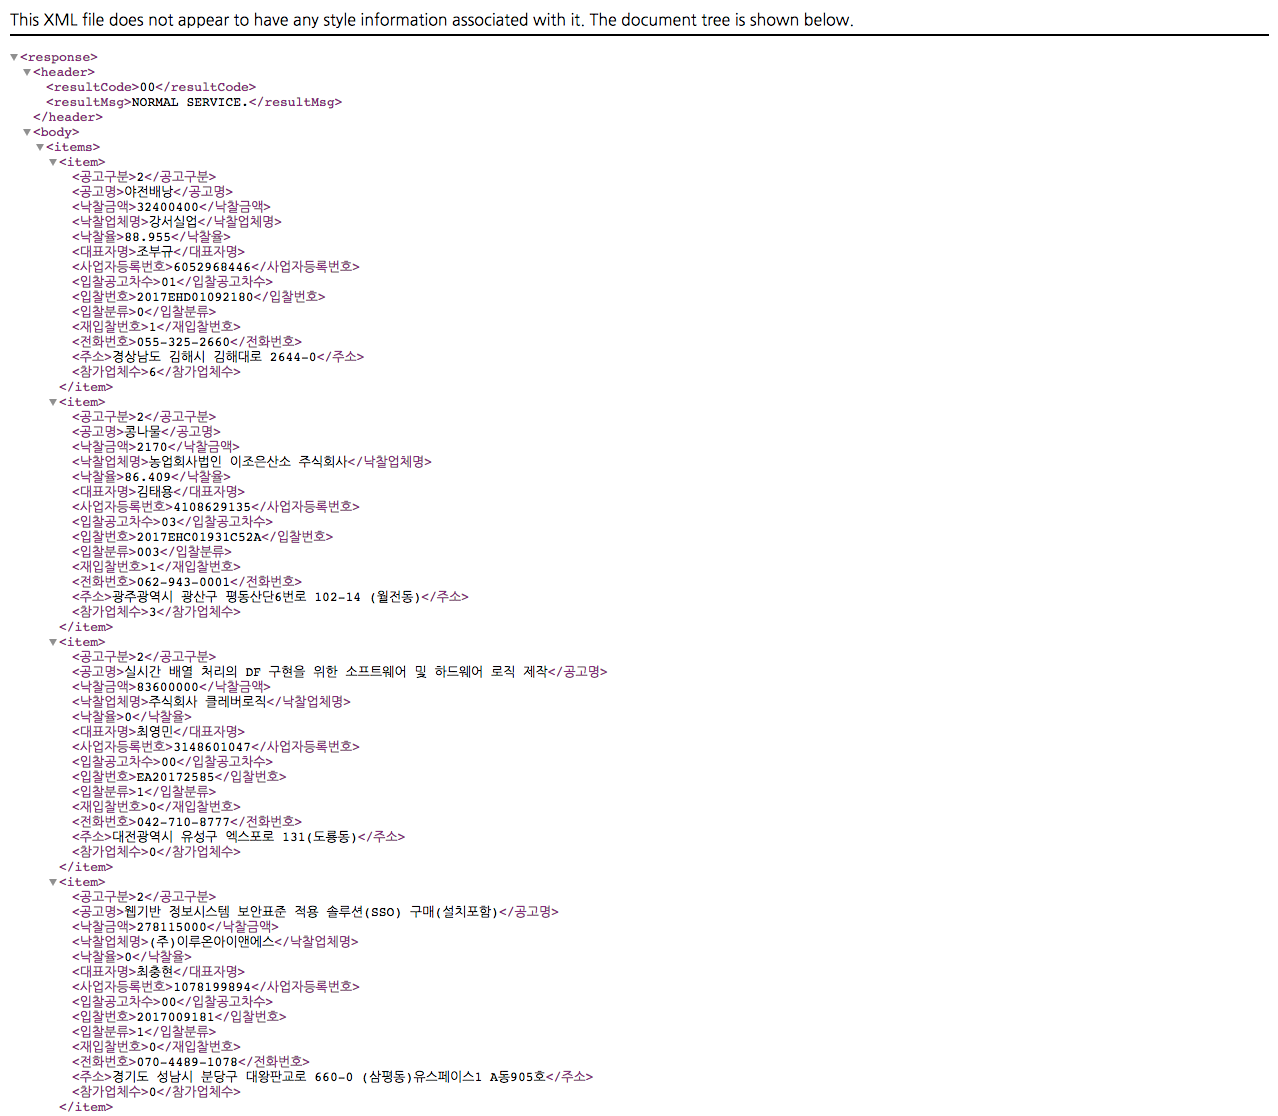

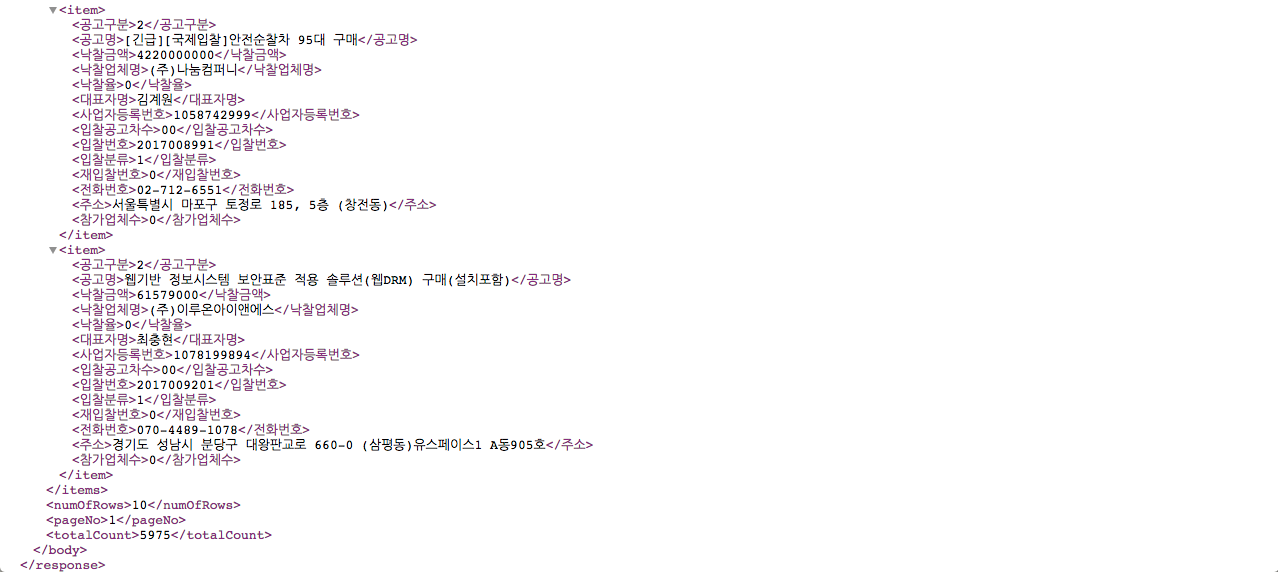

In [10]:
# 앞에서 조합한 url을 출력한 후 웹브라우저에서 접속해보면 xml 구조를 확인할 수 있습니다. 
display_png(file="./Image/조달청 낙찰정보 URL 예시1.png")
display_png(file="./Image/조달청 낙찰정보 URL 예시2.png")

# xml은 header와 body로 구분됩니다. 
# header에는 조회결과("00"-정상)가 제공됩니다. 
# body에는 낙찰리스트(item이 반복)와 페이지당 조회 건수(numOfRows), 
# 페이지수(pageNo), 전체 건수(totalCount)가 제공됩니다.  

In [11]:
# 라이브러리 불러옵니다. 
library(httr)
library(rvest)

# GET() 함수로 url에 request를 보내고 response를 받습니다. 
# 정상적인 response를 받았습니다.
resp <- GET(url)
resp$status_code

Loading required package: xml2


[1] 200

In [12]:
# 이제 XML을 불러옵니다. 
xml <- read_xml(url)
xml

{xml_document}
<response>
[1] <header>\n  <resultCode>00</resultCode>\n  <resultMsg>NORMAL SERVICE.</re ...
[2] <body>\n  <items>\n    <item>\n      <공고구분>2</공고구분>\n      <공고명>콩나물</공고명> ...

In [13]:
# 조회 건수(totalCount)를 확인합니다. 
xml %>% xml_nodes("body totalCount") %>% xml_text()

[1] "5940"

In [14]:
# 낙찰 리스트를 수집합니다. 
# 낙찰 리스트 정보는 xml의 body에 items, item 하위태그로 제공됩니다. 
items <- xml %>% xml_nodes("item")
items

{xml_nodeset (10)}
 [1] <item>\n  <공고구분>2</공고구분>\n  <공고명>콩나물</공고명>\n  <낙찰금액>2170</낙찰금액>\n  <낙찰업체 ...
 [2] <item>\n  <공고구분>2</공고구분>\n  <공고명>실시간 배열 처리의 DF 구현을 위한 소프트웨어 및 하드웨어 로직 제작 ...
 [3] <item>\n  <공고구분>2</공고구분>\n  <공고명>웹기반 정보시스템 보안표준 적용 솔루션(SSO) 구매(설치포함)</공고 ...
 [4] <item>\n  <공고구분>2</공고구분>\n  <공고명>웹기반 정보시스템 보안표준 적용 솔루션(지도엔진) 구매(설치포함)</공 ...
 [5] <item>\n  <공고구분>2</공고구분>\n  <공고명>웹기반 정보시스템 보안표준 적용 솔루션(키보드보안) 구매(설치포함)</ ...
 [6] <item>\n  <공고구분>2</공고구분>\n  <공고명>웹기반 정보시스템 보안표준 적용 솔루션(리포팅툴) 구매(설치포함)</공 ...
 [7] <item>\n  <공고구분>2</공고구분>\n  <공고명>시설물청소차 하부트럭 1대 구입</공고명>\n  <낙찰금액>160000 ...
 [8] <item>\n  <공고구분>2</공고구분>\n  <공고명>[긴급][국제입찰]안전순찰차 95대 구매</공고명>\n  <낙찰금액>4 ...
 [9] <item>\n  <공고구분>2</공고구분>\n  <공고명>웹기반 정보시스템 보안표준 적용 솔루션(웹DRM) 구매(설치포함)</공 ...
[10] <item>\n  <공고구분>2</공고구분>\n  <공고명>2017년 강릉지사 동절기 제설작업용 소금 구매</공고명>\n  <낙찰 ...

In [15]:
# 낙찰 리스트에는 공고구분, 공고명, 낙찰금액, 낙찰업체명, 낙찰율, 대표자명, 사업자등록번호, 
# 입찰공고차수, 입찰번호, 입찰분류, 재입찰번호, 전화번호, 주소, 참가업체수 등의 정보가 제공됩니다. 

# 낙찰업체명만 문자열 벡터로 추출해보겠습니다. 
items %>% xml_nodes("낙찰업체명") %>% xml_text()

[1] "농업회사법인 이조은산소 주식회사" "주식회사 클레버로직"             
 [3] "(주)이루온아이앤에스"             "드림인텍(주)"                    
 [5] "주식회사 하나텍시스템"            "(주)이루온아이앤에스"            
 [7] "타타대우상용차(주)"               "(주)나눔컴퍼니"                  
 [9] "(주)이루온아이앤에스"             "주식회사 제이앤케이 (J&K INC.)"

In [16]:
# 위와 같은 방법으로 텍스트를 추출해주는 나만의 함수를 하나 만듭니다. 
getXmlText <- function(x, var) {
    result <- x %>% xml_nodes(var) %>% xml_text()
    return(result)
}

In [17]:
# 나만의 함수를 테스트합니다. 
comNm <- getXmlText(items, "낙찰업체명")
comNm

[1] "농업회사법인 이조은산소 주식회사" "주식회사 클레버로직"             
 [3] "(주)이루온아이앤에스"             "드림인텍(주)"                    
 [5] "주식회사 하나텍시스템"            "(주)이루온아이앤에스"            
 [7] "타타대우상용차(주)"               "(주)나눔컴퍼니"                  
 [9] "(주)이루온아이앤에스"             "주식회사 제이앤케이 (J&K INC.)"

In [18]:
# 이제 필요한 필요한 컬럼들로 구성된 데이터프레임을 생성해보겠습니다. 
compList <- data.frame(bidGb = getXmlText(items, "공고구분"),
                       bidNm = getXmlText(items, "공고명"),
                       bidAm = getXmlText(items, "낙찰금액"),
                       comNm = getXmlText(items, "낙찰업체명"),
                       bidRt = getXmlText(items, "낙찰율"),
                       ceoNm = getXmlText(items, "대표자명"),
                       comNo = getXmlText(items, "사업자등록번호"),
                       bidNo = getXmlText(items, "입찰번호"),
                       phone = getXmlText(items, "전화번호"),
                       addre = getXmlText(items, "주소"),
                       count = getXmlText(items, "참가업체수"))

# 데이터프레임을 출력합니다. 
compList

bidGb,bidNm,bidAm,comNm,bidRt,ceoNm,comNo,bidNo,phone,addre,count
2,콩나물,2170,농업회사법인 이조은산소 주식회사,86.409,김태용,4108629135,2017EHC01931C52A,062-943-0001,광주광역시 광산구 평동산단6번로 102-14 (월전동),3
2,실시간 배열 처리의 DF 구현을 위한 소프트웨어 및 하드웨어 로직 제작,83600000,주식회사 클레버로직,0,최영민,3148601047,EA20172585,042-710-8777,대전광역시 유성구 엑스포로 131(도룡동),0
2,웹기반 정보시스템 보안표준 적용 솔루션(SSO) 구매(설치포함),278115000,(주)이루온아이앤에스,0,최충현,1078199894,2017009181,070-4489-1078,경기도 성남시 분당구 대왕판교로 660-0 (삼평동)유스페이스1 A동905호,0
2,웹기반 정보시스템 보안표준 적용 솔루션(지도엔진) 구매(설치포함),98101220,드림인텍(주),0,이민석,2208126113,2017009211,02-3141-7575,"서울특별시 용산구 청파로 349-0 (서계동,보은개발빌딩)",0
2,웹기반 정보시스템 보안표준 적용 솔루션(키보드보안) 구매(설치포함),110851602,주식회사 하나텍시스템,0,김승일,1238620507,2017009221,02-2083-2688,경기도 광명시 하안로 60-0 (소하동1345) 광명SK테크노파크 D동 1412호,0
2,웹기반 정보시스템 보안표준 적용 솔루션(리포팅툴) 구매(설치포함),158612440,(주)이루온아이앤에스,0,최충현,1078199894,2017009231,070-4489-1078,경기도 성남시 분당구 대왕판교로 660-0 (삼평동)유스페이스1 A동905호,0
2,시설물청소차 하부트럭 1대 구입,160000000,타타대우상용차(주),0,김관규,4018122865,2017009461,02-2166-3627,전라북도 군산시 동장산로 172 (),0
2,[긴급][국제입찰]안전순찰차 95대 구매,4220000000,(주)나눔컴퍼니,0,김계원,1058742999,2017008991,02-712-6551,"서울특별시 마포구 토정로 185, 5층 (창전동)",0
2,웹기반 정보시스템 보안표준 적용 솔루션(웹DRM) 구매(설치포함),61579000,(주)이루온아이앤에스,0,최충현,1078199894,2017009201,070-4489-1078,경기도 성남시 분당구 대왕판교로 660-0 (삼평동)유스페이스1 A동905호,0
2,2017년 강릉지사 동절기 제설작업용 소금 구매,51150,주식회사 제이앤케이 (J&K INC.),0,김영학,3108800114,2017203761,010-8888-9809,충청북도 청주시 상당구 월평로184번길 45-0 (용암동),0


In [19]:
# 이번에는 조회 기준일자 설정하는 방법을 전달해드리겠습니다. 
# 한 페이지당 1000건씩 조회하고, 조회 기준일자는 2017년 8월로 설정합니다. 
rows <- 1000
strDate <- "20170801"
endDate <- "20170831"

# 조회 조건을 추가하여 URL 조합합니다. 
url <- paste0(main, 
              ctgs[1], 
              paste0("?ServiceKey=", key),
              paste0("&numOfRows=", rows),
              paste0("&sDate=", strDate),
              paste0("&eDate=", endDate))

In [20]:
# 바뀐 url로 request합니다.
# 정상적인 response를 받았습니다.
resp <- GET(url)
resp$status_code

# 이제 바뀐 url로 XML를 불러옵니다.
xml <- read_xml(url)
xml

[1] 200

{xml_document}
<response>
[1] <header>\n  <resultCode>00</resultCode>\n  <resultMsg>NORMAL SERVICE.</re ...
[2] <body>\n  <items>\n    <item>\n      <공고구분>1</공고구분>\n      <공고명>[104024]  ...

In [21]:
# 조회 건수(totalCount)를 확인합니다. 
xml %>% xml_nodes("body totalCount") %>% xml_text()

[1] "6864"

In [22]:
# 낙찰리스트를 items 객체에 할당합니다. 
# 1000건이 할당되었습니다. 
items <- xml %>% xml_nodes("item")
items

{xml_nodeset (1000)}
 [1] <item>\n  <공고구분>1</공고구분>\n  <공고명>[104024] 조립식 핸드홀 HS-2W 1,180set - 연간단가< ...
 [2] <item>\n  <공고구분>1</공고구분>\n  <공고명>레이더 시험장비(DGPS) 구매</공고명>\n  <낙찰금액>181500 ...
 [3] <item>\n  <공고구분>1</공고구분>\n  <공고명>마두지구 배수개선사업 물관리자동화시스템 제조.구매 설치</공고명>\n  ...
 [4] <item>\n  <공고구분>1</공고구분>\n  <공고명>소방지휘차 제조·구매</공고명>\n  <낙찰금액>145047000</낙 ...
 [5] <item>\n  <공고구분>1</공고구분>\n  <공고명>이동식(차량) 관광안내소 제작 구입</공고명>\n  <낙찰금액>5114 ...
 [6] <item>\n  <공고구분>1</공고구분>\n  <공고명>촬영용 발전차량 구입</공고명>\n  <낙찰금액>141908000</낙 ...
 [7] <item>\n  <공고구분>1</공고구분>\n  <공고명>전주솔내초 네트워크장비 구매 집행</공고명>\n  <낙찰금액>71249 ...
 [8] <item>\n  <공고구분>1</공고구분>\n  <공고명>STAR-CCM+ Power session_PLA_(ID-172858. ...
 [9] <item>\n  <공고구분>1</공고구분>\n  <공고명>2017학년도 9월 학교급식 식재료(농산물류) 구매 수의계약 안내공고< ...
[10] <item>\n  <공고구분>1</공고구분>\n  <공고명>2018학년도 소래고등학교 교복 구매 2단계 (규격·가격 분리) 입찰  ...
[11] <item>\n  <공고구분>1</공고구분>\n  <공고명>2018학년도 함현고등학교 교복(동.하복, 생활복) 학교주관 구매 업체 ...
[12] <item>\n  <공고구분>1</공고구분>\n  <공고명>성주배수지 프로세스제어설비 제작구입 설치</공고명>\n  <낙찰금액>1

In [23]:
# 이제 필요한 필요한 컬럼들로 구성된 데이터프레임을 생성해보겠습니다. 
compList <- data.frame(bidGb = getXmlText(items, "공고구분"),
                       bidNm = getXmlText(items, "공고명"),
                       bidAm = getXmlText(items, "낙찰금액"),
                       comNm = getXmlText(items, "낙찰업체명"),
                       bidRt = getXmlText(items, "낙찰율"),
                       ceoNm = getXmlText(items, "대표자명"),
                       comNo = getXmlText(items, "사업자등록번호"),
                       bidNo = getXmlText(items, "입찰번호"),
                       phone = getXmlText(items, "전화번호"),
                       addre = getXmlText(items, "주소"),
                       count = getXmlText(items, "참가업체수"))

# 각 벡터의 길이가 달라 에러가 발생했습니다!!
# 중간에 공란이 있어서 벡터들이 길이가 달라진 것 같습니다. 

ERROR: Error in data.frame(bidGb = getXmlText(items, "공고구분"), bidNm = getXmlText(items, : arguments imply differing number of rows: 1000, 991


In [24]:
# 모든 벡터들의 길이를 확인해보겠습니다. 
checkCount <- function(x, var) {
    test <- getXmlText(items, var)
    cat(var, ":", length(test), "\n")
}

vars <- c("공고구분","공고명","낙찰금액","낙찰업체명","낙찰율","대표자명","사업자등록번호","입찰번호","전화번호","주소","참가업체수")
for (var in vars) {
    checkCount(items, var)
}

# 낙찰율 벡터만 991개로 길이가 다릅니다!! 

공고구분 : 1000 
공고명 : 1000 
낙찰금액 : 1000 
낙찰업체명 : 1000 
낙찰율 : 991 
대표자명 : 1000 
사업자등록번호 : 1000 
입찰번호 : 1000 
전화번호 : 1000 
주소 : 1000 
참가업체수 : 1000 


In [25]:
# 문제해결을 위해 xml_nodes() 대신에 xml_node()를 사용합니다.
# xml_node()는 항상 같은 길이의 리스트를 반환하기 때문에 공란을 NA로 치환합니다!! 
# 하지만 xml_node()는 같은 조건을 만족하는 여러 태그가 있을 때 맨 처음 하나만 반환합니다.
# 따라서 상황에 맞게 두 함수를 사용해야 합니다! 

# 텍스트를 추출하는 나만의 함수를 아래와 같이 바꿉니다. 
getXmlText <- function(x, var) {
    result <- x %>% xml_node(var) %>% xml_text()
    return(result)
}

In [26]:
# 바뀐 함수로 데이터프레임을 생성해보겠습니다. 
compList <- data.frame(bidGb = getXmlText(items, "공고구분"),
                       bidNm = getXmlText(items, "공고명"),
                       bidAm = getXmlText(items, "낙찰금액"),
                       comNm = getXmlText(items, "낙찰업체명"),
                       bidRt = getXmlText(items, "낙찰율"),
                       ceoNm = getXmlText(items, "대표자명"),
                       comNo = getXmlText(items, "사업자등록번호"),
                       bidNo = getXmlText(items, "입찰번호"),
                       phone = getXmlText(items, "전화번호"),
                       addre = getXmlText(items, "주소"),
                       count = getXmlText(items, "참가업체수"))

# 데이터프레임의 구조를 확인합니다. 
str(compList)

'data.frame':	1000 obs. of  11 variables:
 $ bidGb: chr  "1" "1" "1" "1" ...
 $ bidNm: chr  "[104024] 조립식 핸드홀 HS-2W 1,180set - 연간단가" "레이더 시험장비(DGPS) 구매" "마두지구 배수개선사업 물관리자동화시스템 제조.구매 설치" "소방지휘차 제조·구매" ...
 $ bidAm: chr  "1639880" "181500000" "87566600" "145047000" ...
 $ comNm: chr  "선진기업 주식회사" "메이거스 테크놀로지" "(주)에프엠텔레콤" "주식회사 와풀" ...
 $ bidRt: chr  "88.578" "97.671" "88.007" "89.981" ...
 $ ceoNm: chr  "한재명" "정수영" "정광우" "송봉주" ...
 $ comNo: chr  "3088102745" "1190639529" "2048145651" "1178186004" ...
 $ bidNo: chr  "20170722421" "20170825040" "20170809341" "20170812934" ...
 $ phone: chr  "041-834-6557" "02-830-3070" "070-8270-5500" "02-2678-3080" ...
 $ addre: chr  "충청남도 부여군 선사로 12 (석성면)" "경기도 성남시 분당구 판교로 253-0 (삼평동, 판교 이노밸리)" "경기도 성남시 중원구 사기막골로 177, 701호, 702호, 703호 (상대원동)" "경기도 김포시 월곶면 김포대로 2980-0" ...
 $ count: chr  "6" "1" "44" "2" ...


In [27]:
# 낙찰율에 NA가 있는지 확인해봅니다. 
compList[is.na(compList$bidRt)==T,]

,bidGb,bidNm,bidAm,comNm,bidRt,ceoNm,comNo,bidNo,phone,addre,count
67,1,서울시 초고속정보통신망 통신장비 구매설치,1804000000,아이크래프트 주식회사,NA,박우진,2208175308,20170628366,02-541-0474,"서울특별시 강남구 언주로 726, 두산빌딩 12F (논현동)",5
130,1,2018학년도 경북대사대부고 신입생 교복(동.하복) 학교주관 구매,239000,스쿨룩스 수성황금점,NA,김영인,5023058311,20170809742,010-9245-7541,"대구광역시 수성구 동대구로 95-0 (두산동, 수성 SK 리더스뷰 상가406호)",4
132,1,철원군 디자인 조형물 제작설치 사업(협상에 의한 계약) 입찰 공고,620400000,김현선디자인연구소,NA,김현선,2117390839,20170729582,02-545-6789,서울특별시 성동구 서울숲2길 42-0 (성수동1가),0
257,1,IBK기업은행 2018년 VVIP포켓수첩 제작,98600000,오롬(주),NA,이호열,2028137645,20170808112,02-2273-7011,"서울특별시 중구 퇴계로36가길 10, 3층 (필동2가, 세정아이티빌딩)",0
260,1,품질검사장비(모의태양장치)구매,61040000,(주)동욱씨앤아이,NA,이진형,1078194088,20170823049,02-783-5142,"서울특별시 영등포구 63로 32, 라이프콤비빌딩702호 (여의도동)",1
315,1,교수학습망 노후 L3스위치 교체사업,91936000,(주)제로정보기술,NA,민대기,3018123749,20170800272,043-221-6161,"충청북도 청주시 상당구 중고개로 285, 1층 101호,102호,103호,104호,지하층 비01호(금천동)",3
453,1,노원구 CCTV 자가통신망 고도화사업 장비구매 설치,129712000,(주)메트로컴넷,NA,최선민,1108157338,20170717485,02-395-7199,"서울특별시 서대문구 연희로41다길 3, 성진빌딩2층 (홍은동)",0
499,1,IP관리 네트워크접근통제시스템 업그레이드 및 교체 사업,181440000,대신정보통신 주식회사,NA,이재원,4088118945,20170806597,02-2107-5014,"광주광역시 서구 상무중앙로 110-0 (치평동, 광주보험회관)",2
913,1,특성화사업 물리치료과 실험실습기자재(도롭오토테이블외7종)구입-긴급,73800000,베스트 메디칼,NA,김영필,4100892187,20170726229,062-261-3235,"광주광역시 북구 서하로245번길 42, 1층 (오치동)",3


# End of Document